### 最適化理論特論　課題    
                                      学籍番号 4414036  氏名  小坪琢人

In [15]:
import numpy as np
from sympy import *
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

課題の関数など必要な関数をそれぞれ定義する
$$ f(x_1,x_2) = 10 (x_1^2 - x_2)^2 + (x_1 - 1)^2 $$

In [4]:
# 関数
def f(x):
    return 10*(x[0]**2 - x[1])**2 + (x[0] - 1)**2

# 導関数
def df(x):
    return np.array([40*x[0]*(x[0]**2 - x[1]) + 2*x[0] - 2,
                     -20*x[0]**2 + 20*x[1]])
# ヘッセ行列
def hesse(x):
    return np.array([[float(120*x[0]**2 - 40*x[1] + 2),float(-40*x[0])],
                     [float(-40*x[0]),20]])
    
# Armijo条件
def armijo_method(x,d):
    g,t = 0.1,0.5 # 初期条件
    b = 1
    while f(x+b*d) >= f(x) + g*b*(np.dot(df(x).T,d)):
        b = b*t
    return b

# BFGS公式
def BFGS(beta,tmp_new,tmp):
    s = tmp_new - tmp
    y = df(tmp_new) - df(tmp)
    B_s,s_B_s,s_y = np.dot(beta,s),np.dot(np.dot(s.T,beta),s),np.dot(s.T,y)
    tmp_beta = beta - np.dot(B_s,B_s.T)/s_B_s + np.dot(y,y.T)/s_y
    return tmp_beta

初期値, 正定値対称な初期行列をそれぞれ定義する
$$
x_0 = 
\begin{bmatrix}
0 \\
2 
\end{bmatrix}
$$

$$
\beta_0 = 
\begin{bmatrix}
1 & -2 \\
-2 & 6
\end{bmatrix}
$$

In [5]:
# 初期値
start_point = np.array([[0],[2]])
# 正定値対称な初期行列
start_beta = np.array([[1,-2],[-2,6]])

最急降下法, ニュートン法, 準ニュートン法の関数をアルゴリズムに従って定義する.

In [6]:
# 最急降下法
def gradient_descent_method(point):
    eps  = 1e-5 # 終了条件
    tmp = point # 点の移動用
    history = point # 数値を記録
    iteration = 1000 # 最大繰り返し回数
    
    for i in range(iteration):
        d = -df(tmp) # 探索方向
        alpha = armijo_method(tmp,d) # ステップ幅
        tmp_new = tmp + alpha*d
        if np.abs(np.linalg.norm(tmp-tmp_new)) < eps:
            break
        tmp = tmp_new
        history = np.concatenate([history,tmp],axis = 1)
    return history.T

# ニュートン法
def newton_method(point):
    eps  = 1e-5 # 終了条件
    tmp = point # 点の移動用
    history = point # 数値を記録
    iteration = 1000 # 最大繰り返し回数
    for i in range(iteration):
        d = - np.dot(np.linalg.inv(hesse(tmp)),df(tmp)) # 探索方向
        tmp_new = tmp + d
        if np.abs(np.linalg.norm(tmp-tmp_new)) < eps:
            break
        tmp = tmp_new
        history = np.concatenate([history,tmp],axis = 1)        
    return history.T

# 準ニュートン法
def quasi_newton_method(point,beta):
    eps  = 1e-5 # 終了条件
    tmp = point # 点の移動用
    tmp_b = beta # 正定値行列の変更用
     
    history = point # 数値を記録
    iteration = 1000 # 最大繰り返し回数
    
    for i in range(iteration):
        d = - np.dot(np.linalg.inv(tmp_b),df(tmp)) # 探索方向
        alpha = armijo_method(tmp,d) # ステップ幅
        tmp_new = tmp + alpha*d
        if np.abs(np.linalg.norm(tmp-tmp_new)) < eps:
            break
        tmp_b = BFGS(tmp_b,tmp_new,tmp) # betaの更新
        tmp = tmp_new
        history = np.concatenate([history,tmp],axis = 1)        
    return history.T

In [7]:
data_gradient = gradient_descent_method(start_point)
data_newton = newton_method(start_point)
data_quasi_newton = quasi_newton_method(start_point,start_beta)

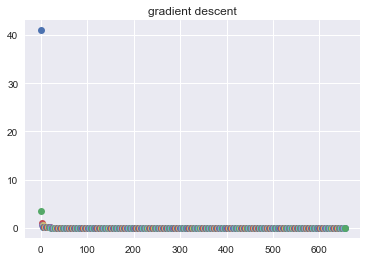

In [26]:
sns.plt.title('gradient descent')
for i in range(len(data_gradient)):
    plt.plot(i,f(data_gradient[i]),"o")

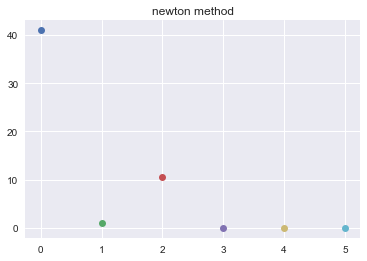

In [27]:
sns.plt.title('newton method')
for i in range(len(data_newton)):
    plt.plot(i,f(data_newton[i]),"o")

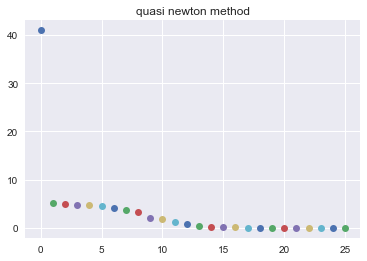

In [28]:
sns.plt.title('quasi newton method')
for i in range(len(data_quasi_newton)):
    plt.plot(i,f(data_quasi_newton[i]),"o")